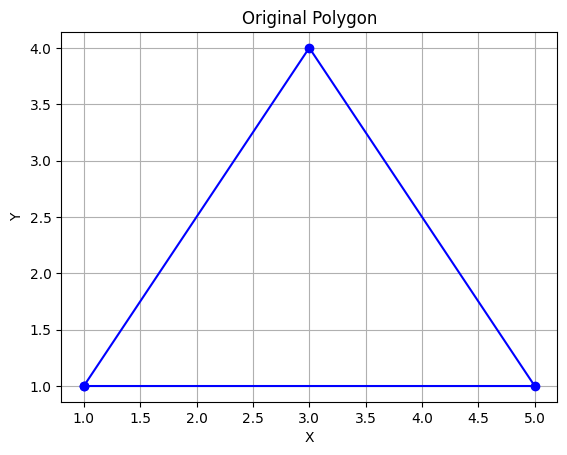

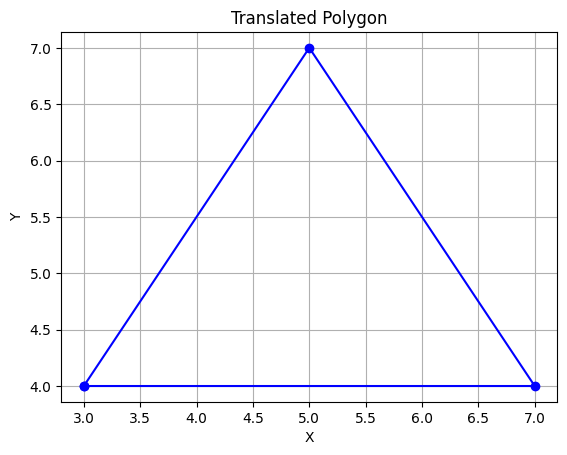

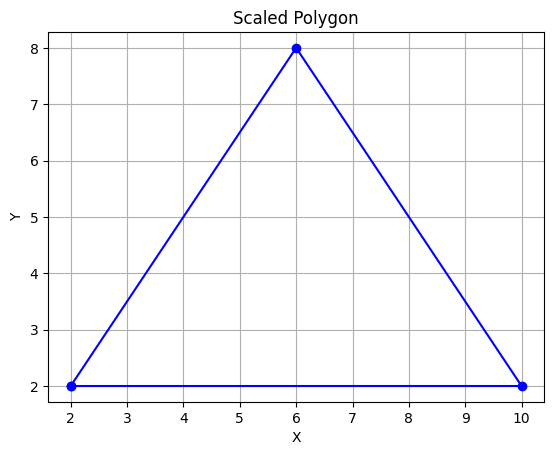

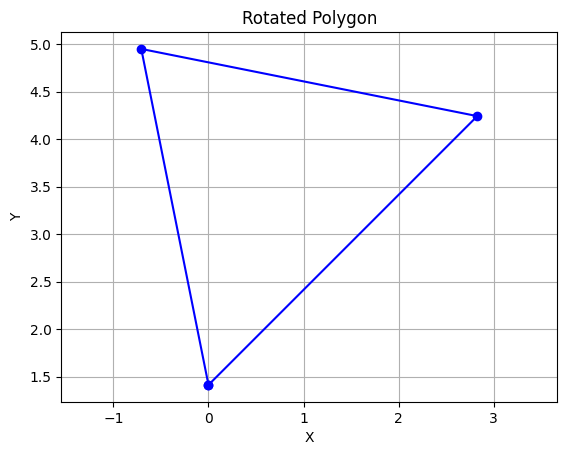

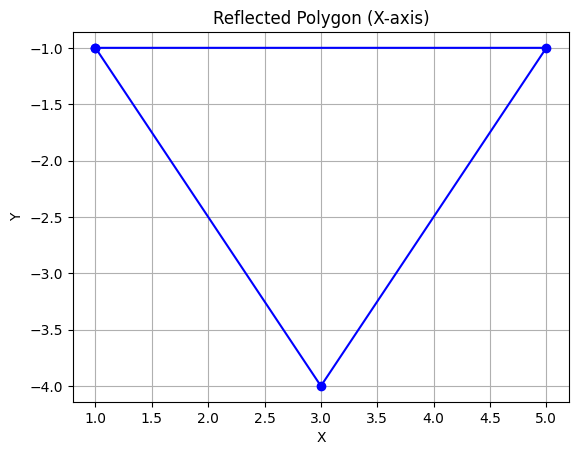

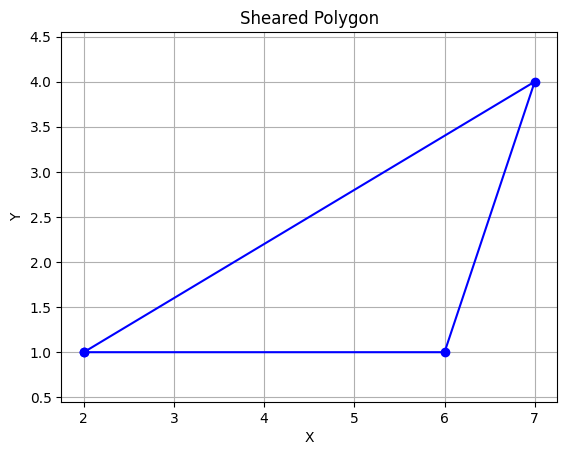

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_polygon(polygon, title="Polygon Transformation"):
    polygon = np.vstack([polygon, polygon[0]])
    plt.figure()
    plt.plot(polygon[:, 0], polygon[:, 1], 'bo-')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

def translate(polygon, tx, ty):
    transformation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return apply_transformation(polygon, transformation_matrix)

def scale(polygon, sx, sy):
    transformation_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    return apply_transformation(polygon, transformation_matrix)

def rotate(polygon, angle):
    angle_rad = np.radians(angle)
    transformation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad), 0],
        [np.sin(angle_rad), np.cos(angle_rad), 0],
        [0, 0, 1]
    ])
    return apply_transformation(polygon, transformation_matrix)

def reflect(polygon, axis):
    if axis == 'x':
        transformation_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        transformation_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    return apply_transformation(polygon, transformation_matrix)

def shear(polygon, shx, shy):
    transformation_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    return apply_transformation(polygon, transformation_matrix)

def apply_transformation(polygon, transformation_matrix):
    ones = np.ones((polygon.shape[0], 1))
    homogeneous_polygon = np.hstack([polygon, ones])
    transformed_polygon = homogeneous_polygon @ transformation_matrix.T
    return transformed_polygon[:, :2]

# Example Usage
polygon = np.array([[1, 1], [5, 1], [3, 4]])
plot_polygon(polygon, "Original Polygon")

translated_polygon = translate(polygon, 2, 3)
plot_polygon(translated_polygon, "Translated Polygon")

scaled_polygon = scale(polygon, 2, 2)
plot_polygon(scaled_polygon, "Scaled Polygon")

rotated_polygon = rotate(polygon, 45)
plot_polygon(rotated_polygon, "Rotated Polygon")

reflected_polygon = reflect(polygon, 'x')
plot_polygon(reflected_polygon, "Reflected Polygon (X-axis)")

sheared_polygon = shear(polygon, 1, 0)
plot_polygon(sheared_polygon, "Sheared Polygon")


Translated Image


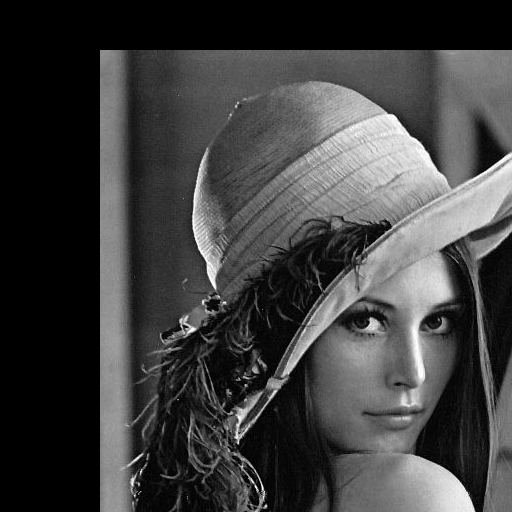

Reflected Image


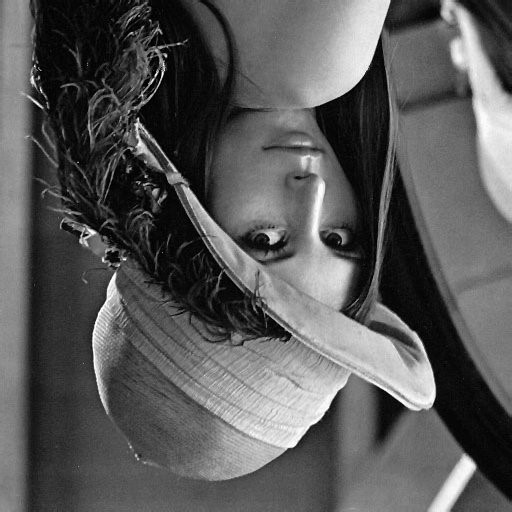

Rotated Image


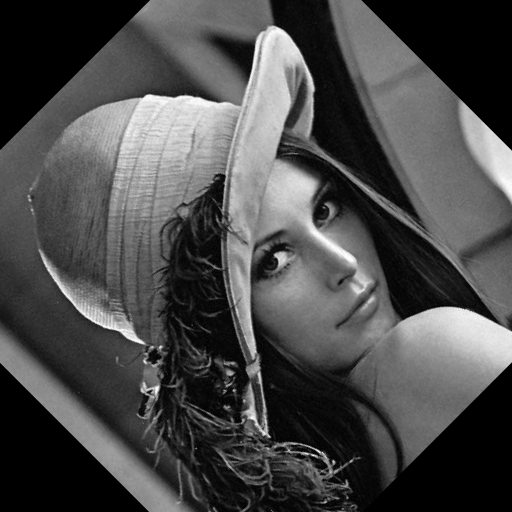

Scaled Image


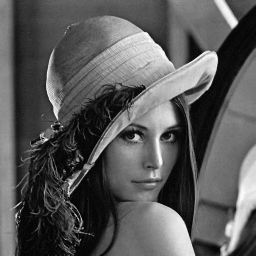

Cropped Image


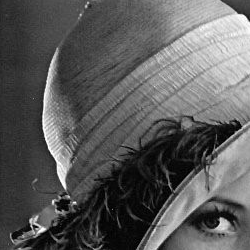

Sheared Image (X-axis)


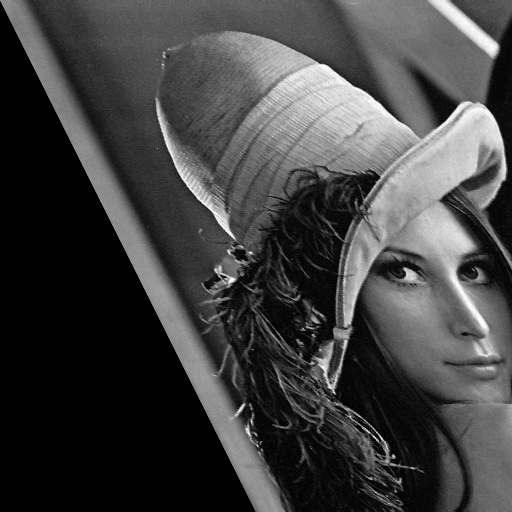

Sheared Image (Y-axis)


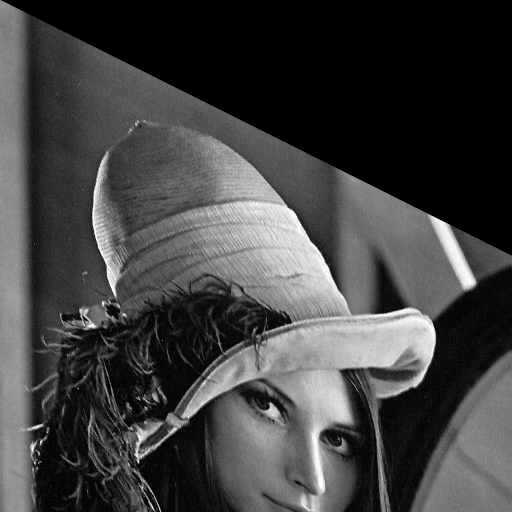

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow





def show_image(title, image):
    print(title)
    cv2_imshow(image)

def translate_image(image, tx, ty):
    height, width = image.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, translation_matrix, (width, height))
    return translated_image

def reflect_image(image, axis):
    if axis == 'x':
        reflected_image = cv2.flip(image, 0)
    elif axis == 'y':
        reflected_image = cv2.flip(image, 1)
    elif axis == 'xy':
        reflected_image = cv2.flip(image, -1)
    else:
        raise ValueError("Invalid axis. Choose from 'x', 'y', or 'xy'.")
    return reflected_image

def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

def scale_image(image, scale_x, scale_y):
    height, width = image.shape[:2]
    scaled_image = cv2.resize(image, (int(width * scale_x), int(height * scale_y)))
    return scaled_image

def crop_image(image, x_start, y_start, x_end, y_end):
    cropped_image = image[y_start:y_end, x_start:x_end]
    return cropped_image

def shear_image_x(image, shear_factor):
    height, width = image.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (width, height))
    return sheared_image

def shear_image_y(image, shear_factor):
    height, width = image.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_image = cv2.warpAffine(image, shear_matrix, (width, height))
    return sheared_image

# Example Usage
image_path = '/content/sample_data/Picture1.jpg'
image = load_image(image_path)

translated_image = translate_image(image, 100, 50)
show_image("Translated Image", translated_image)

reflected_image = reflect_image(image, 'x')
show_image("Reflected Image", reflected_image)

rotated_image = rotate_image(image, 45)
show_image("Rotated Image", rotated_image)

scaled_image = scale_image(image, 0.5, 0.5)
show_image("Scaled Image", scaled_image)

cropped_image = crop_image(image, 50, 50, 300, 300)
show_image("Cropped Image", cropped_image)

sheared_image_x = shear_image_x(image, 0.5)
show_image("Sheared Image (X-axis)", sheared_image_x)

sheared_image_y = shear_image_y(image, 0.5)
show_image("Sheared Image (Y-axis)", sheared_image_y)